Animals Classification: Dataset consists of images of 10 animals
Dataset: https://www.kaggle.com/alessiocorrado99/animals10/downloads/animals10.zip/1

In [158]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)

GPU Available:  True
Tensorflow Version:  2.0.0-beta1


In [159]:
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.2.4-tf


In [0]:
import numpy
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [121]:
!unzip "/animals10.zip"

Archive:  /content/drive/My Drive/colab/animals10.zip
replace raw-img/pecora/OIP-5uive4uTyjqs3IFaPQH4OgHaFi.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [61]:
mkdir animals_dataset

mkdir: cannot create directory ‘animals_dataset’: File exists


In [11]:
cd /content

/content


In [122]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (50, 256, 256, 3)
Label batch shape:  (50, 10)


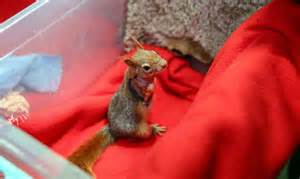

300 179


In [123]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/animals_dataset/squirrel/OIF-T8WZ6u8BZLYF85W3fCTC1w.jpeg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
height = np.size(img, 0)
width = np.size(img, 1)
print(width,height)

In [124]:
IMAGE_SIZE = 256
BATCH_SIZE = 50

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/animals_dataset',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    '/content/animals_dataset',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 43677 images belonging to 10 classes.
Found 10914 images belonging to 10 classes.


In [125]:
print (train_generator.class_indices)

{'Hen': 0, 'butterfly': 1, 'cat': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [0]:
# Learn about dataset labels
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('animal_labels.txt', 'w') as f:
  f.write(labels)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='mse',optimizer='adam',metrics=['acc'])

#model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [165]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=14,
      validation_data=val_generator,
      validation_steps=50)

Epoch 1/14
100/100 [==============================] - 30s 298ms/step - loss: 0.0542 - acc: 0.5988 - val_loss: 0.0536 - val_acc: 0.5996
Epoch 2/14
100/100 [==============================] - 28s 283ms/step - loss: 0.0515 - acc: 0.6164 - val_loss: 0.0489 - val_acc: 0.6504
Epoch 3/14
100/100 [==============================] - 28s 282ms/step - loss: 0.0505 - acc: 0.6192 - val_loss: 0.0478 - val_acc: 0.6460
Epoch 4/14
100/100 [==============================] - 28s 278ms/step - loss: 0.0496 - acc: 0.6326 - val_loss: 0.0475 - val_acc: 0.6620
Epoch 5/14
100/100 [==============================] - 29s 289ms/step - loss: 0.0483 - acc: 0.6452 - val_loss: 0.0450 - val_acc: 0.6736
Epoch 6/14
100/100 [==============================] - 28s 280ms/step - loss: 0.0458 - acc: 0.6610 - val_loss: 0.0424 - val_acc: 0.6916
Epoch 7/14
100/100 [==============================] - 29s 288ms/step - loss: 0.0456 - acc: 0.6610 - val_loss: 0.0427 - val_acc: 0.6892
Epoch 8/14
100/100 [==============================] - 2

In [166]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 256)      

In [167]:
history.history

{'acc': [0.5987543,
  0.6164,
  0.6192,
  0.6326,
  0.6452,
  0.661,
  0.661,
  0.6712,
  0.697,
  0.7394,
  0.734,
  0.7462,
  0.7336,
  0.7498],
 'loss': [0.054257950221010785,
  0.051496584601700306,
  0.050501842759549616,
  0.049570421874523166,
  0.04826187441125512,
  0.045759950075298546,
  0.04556019419804216,
  0.044082910474389794,
  0.041341246869415045,
  0.03657672576606274,
  0.03693841787055135,
  0.03544472299516201,
  0.036728960480540994,
  0.03534784737974405],
 'val_acc': [0.5996,
  0.6504,
  0.646,
  0.662,
  0.6736,
  0.6916,
  0.6892,
  0.7124,
  0.706,
  0.7084,
  0.7376,
  0.738,
  0.7204,
  0.7488],
 'val_loss': [0.0536031586676836,
  0.04894925497472286,
  0.047760767191648484,
  0.04753685921430588,
  0.04503592424094677,
  0.04239382591098547,
  0.04270278371870518,
  0.040275349393486974,
  0.04042967598885298,
  0.04069515507668257,
  0.03644570037722587,
  0.03617439348250628,
  0.038304036371409896,
  0.03529128942638635]}

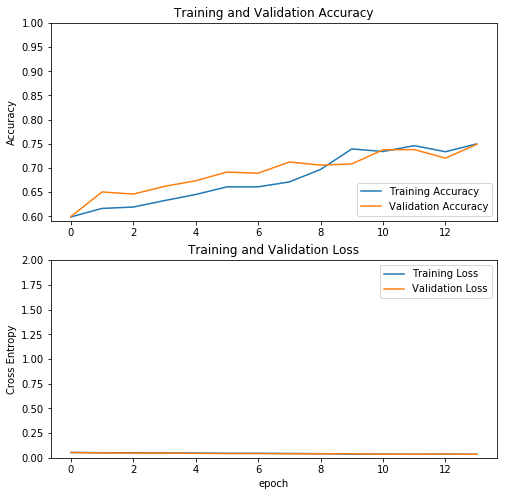

In [168]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
model.save('animals_modelfinal1.h5')

In [170]:
defined_classes = train_generator.class_indices
print(defined_classes)

print(IMAGE_SIZE)

{'Hen': 0, 'butterfly': 1, 'cat': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
256


In [172]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('animals_modelfinal.h5')
model.compile(loss='mse',optimizer='adam',metrics=['acc'])
# predicting images
img = image.load_img('/content/h2.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)

# predicting multiple images at once
img = image.load_img('/content/h1.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

img = image.load_img('/content/b1.jpg', target_size=(img_width, img_height))
z = image.img_to_array(img)
z = np.expand_dims(z, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y, z])
classes = model.predict_classes(images, batch_size=10)
print(classes)


print(classes)

[9 1 1]
[9 1 1]


In [0]:
defined_classes.get('1')